In [1]:
import pyift.pyift as ift
import matplotlib.pyplot as plt

### Read an image img, create a circular adjacency relation A (a disk) with radius 3.0, and show the original image

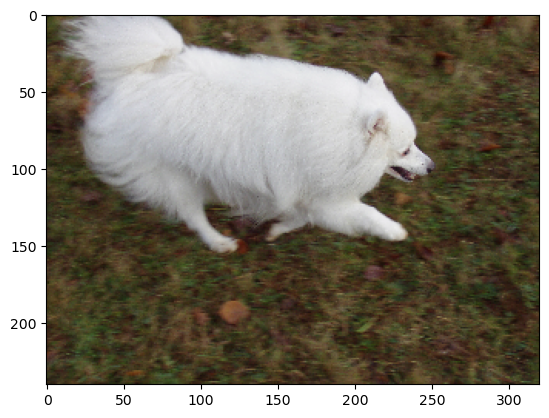

In [2]:
img = ift.ReadImageByExt("images/dog.png")
A   = ift.Circular(3.0)
plt.imshow(img.ToPlot())

### Morphological gradients can be created by subtracting an image from its erosion, subtracting its dilation from the image, or subtracting its dilation from its erosion. Compute a morphological gradient. 

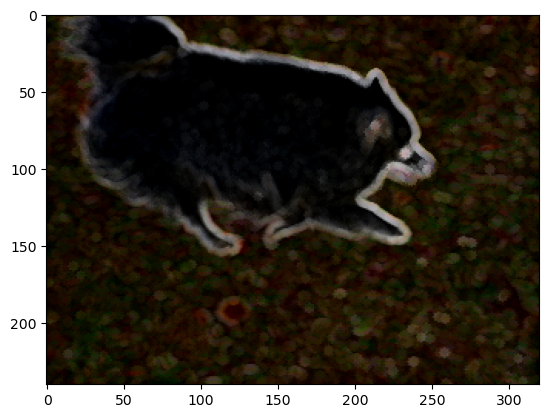

In [3]:
# Dilation and erosion are applied to grayscale/binary images. Since the image is colored, 
# the operations are applied to the luminance channel. One can restrict dilation and erosion
# inside a given binary mask (None indicates there is no mask)

dil  = ift.Dilate(img, A, None)
ero  = ift.Erode(img, A, None)
grad = ift.Sub(dil, ero)
plt.imshow(grad.ToPlot())

### Color images in pyift are stored in the YCbCr color space. You may convert them to numpy arrays, but you will need a conversion from YCbCr to RGB in numpy.

In [4]:
import numpy as np

In [5]:
def rgb2ycbcr(im):
    cbcr = np.empty_like(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    # Y
    cbcr[:,:,0] = .299 * r + .587 * g + .114 * b
    # Cb
    cbcr[:,:,1] = 128 - .169 * r - .331 * g + .5 * b
    # Cr
    cbcr[:,:,2] = 128 + .5 * r - .419 * g - .081 * b
    return np.uint8(cbcr)

def ycbcr2rgb(im):
    rgb = np.empty_like(im)
    y   = im[:,:,0]
    cb  = im[:,:,1] - 128
    cr  = im[:,:,2] - 128
    # R
    rgb[:,:,0] = y + 1.402 * cr
    # G
    rgb[:,:,1] = y - .34414 * cb - .71414 * cr
    # B
    rgb[:,:,2] = y + 1.772 * cb
    return np.uint8(rgb)


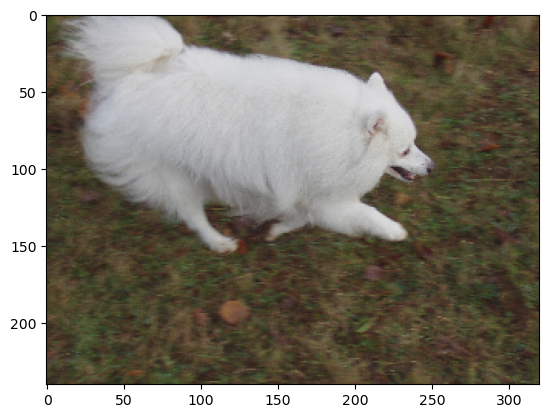

In [6]:
img = img.AsNumPy()
img = ycbcr2rgb(img)
plt.imshow(img)
plt.show()

### Read an iris image for pupil segmentation

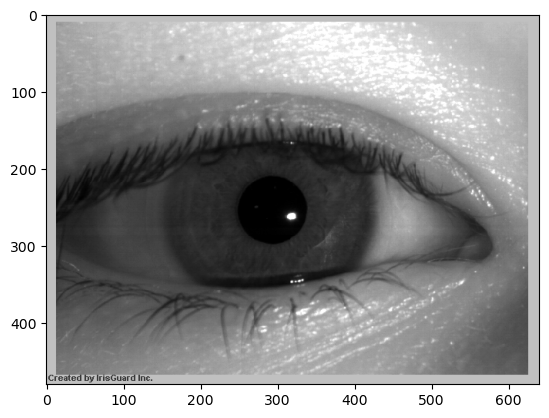

In [7]:
img = ift.ReadImageByExt("images/iris.png")
plt.imshow(img.ToPlot())

### Threshold the image to extract pupil pixels with false positives and negatives

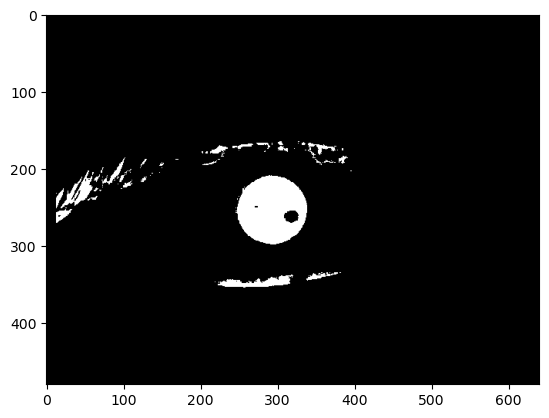

In [8]:
bin = ift.Threshold(img,0,20,255) 
plt.imshow(bin.ToPlot())

### In mathematical morphology, dilation followed by erosion defines a closing operation. Erosion followed by dilation defines an opening operation. Pyift has special implementations of dilation and erosion for binary images based on the Image Foresting Transform, which allows fast morphological operations in sublinear time to the image size. In this case, a closing with a disk of radius 15.0 can eliminate the false negatives. An opening with a disk of radius 30.0 can eliminate the false positives. 

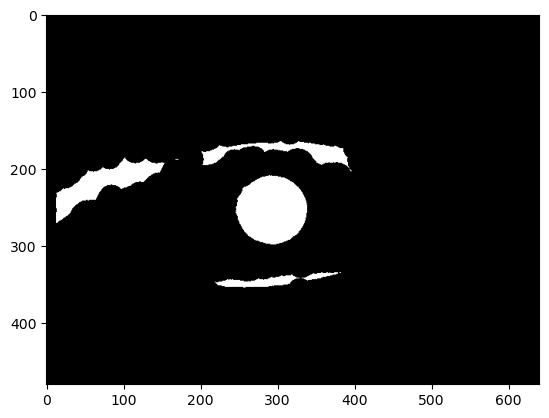

In [9]:
cimg = ift.CloseBin(bin, 15.0)
plt.imshow(cimg.ToPlot())

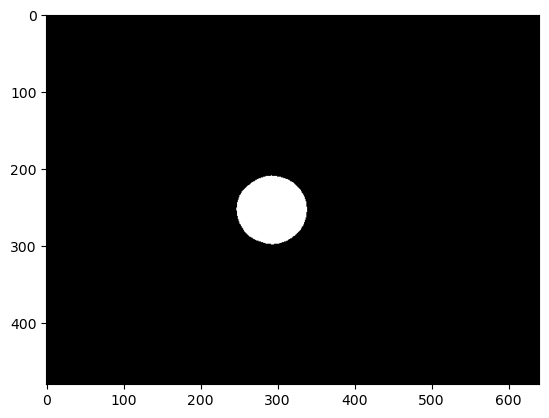

In [10]:
oimg  = ift.OpenBin(cimg, 30.0)
plt.imshow(oimg.ToPlot())

### Extract a Region of Interest (ROI) around the center of the pupil that contains the iris surrounded by a small background. 

293 254


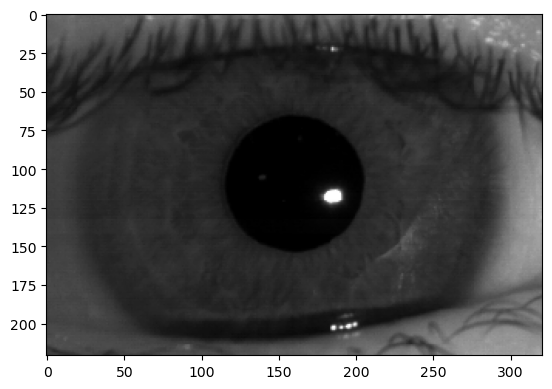

In [11]:
bin = ift.Threshold(oimg,1,255,1) # force pixel values in {0,1}.
S  = ift.GeodesicCenters(bin) # receives a labeled image whose pixel values are {0,1,2,...}
xc = S.elem%oimg.xsize
yc = S.elem//oimg.xsize
print(xc,yc)
bb = ift.BoundingBox()
bb.begin.x = max(0, xc - 160)
bb.begin.y = max(0, yc - 110)
bb.end.x   = min(oimg.xsize-1, xc + 160)
bb.end.y   = min(oimg.ysize-1, yc + 110)
roi = ift.ExtractROI(img, bb)  
plt.imshow(roi.ToPlot())
imshow